In [1]:
%pip install yfinance

                                              0.0/119.4 kB ? eta -:--:--
     -----------------------------------    112.6/119.4 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 119.4/119.4 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
                                              0.0/949.2 kB ? eta -:--:--
     ---------                              235.5/949.2 kB 7.3 MB/s eta 0:00:01
     ----------------                       409.6/949.2 kB 8.5 MB/s eta 0:00:01
     -------------------------------------  942.1/949.2 kB 8.5 MB/s eta 0:00:01
     -------------------------------------- 949.2/949.2 kB 6.7 MB/s eta 0:00:00
  Installing build dependencies: started
  I

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# step no 1 import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
#set seaborn style
sns.set_style('whitegrid')
%matplotlib inline

In [16]:
# step 2 fetch  stock data 
# define date range 
ticker = 'RELIANCE.NS'
start_date = '2020-01-01'
end_date = '2025-07-30'

stock_data = yf.download(ticker,start=start_date,end=end_date,progress=False)

# display data 
print(stock_data.head())

Price            Close        High         Low        Open      Volume
Ticker     RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
Date                                                                  
2020-01-01  678.021362  685.881324  676.179942  681.794149    14004468
2020-01-02  689.564331  692.101988  679.099372  679.099372    17710316
2020-01-03  690.395203  692.416334  684.039846  688.531236    20984698
2020-01-06  674.383423  686.240675  672.811418  682.692512    24519177
2020-01-07  684.758606  689.205083  679.773116  682.243375    16683622


In [122]:
# sample dataset 

dates = pd.date_range(start='2020-01-01',end='2020-12-31',freq='B')
np.random.seed(42)
sample_data = {
    'Open':np.random.uniform(1400,1600,len(dates)),
     'High':np.random.uniform(1450,1650,len(dates)),
      'Low':np.random.uniform(1100,1650,len(dates)),
       'Close':np.random.uniform(1400,1600,len(dates)),
        'Adj Close':np.random.uniform(1400,1600,len(dates)),
         'Volume':np.random.randint(100000,100000000,len(dates)),
}

stock_data = pd.DataFrame(sample_data,index=dates)
stock_data.to_csv('reliance_sample_data.csv')
print(stock_data.head())

                   Open         High          Low        Close    Adj Close  \
2020-01-01  1474.908024  1478.016803  1561.080788  1516.678359  1574.019775   
2020-01-02  1590.142861  1553.665930  1357.781238  1480.170283  1404.253882   
2020-01-03  1546.398788  1625.474614  1328.150726  1492.401161  1574.940335   
2020-01-06  1519.731697  1598.153724  1250.373890  1589.456668  1505.787427   
2020-01-07  1431.203728  1589.403148  1131.006523  1430.670281  1587.813540   

              Volume  
2020-01-01  75755174  
2020-01-02  19728490  
2020-01-03  85211891  
2020-01-06  93521775  
2020-01-07  70289955  


In [123]:
# basic info
print(stock_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2020-01-01 to 2020-12-31
Freq: B
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       262 non-null    float64
 1   High       262 non-null    float64
 2   Low        262 non-null    float64
 3   Close      262 non-null    float64
 4   Adj Close  262 non-null    float64
 5   Volume     262 non-null    int32  
dtypes: float64(5), int32(1)
memory usage: 13.3 KB
None


In [124]:
print(stock_data.describe())

              Open         High          Low        Close    Adj Close  \
count   262.000000   262.000000   262.000000   262.000000   262.000000   
mean   1498.536012  1552.920911  1363.243012  1496.906563  1502.880626   
std      59.386523    60.509752   154.724730    58.388343    60.004859   
min    1401.012317  1452.167530  1107.999566  1400.926405  1401.277174   
25%    1447.469240  1506.038244  1226.495446  1445.191165  1446.980020   
50%    1501.124971  1557.673149  1356.127560  1497.685616  1507.695980   
75%    1550.657241  1605.392685  1500.792562  1544.828362  1555.767514   
max    1598.010770  1648.592959  1649.844720  1599.374850  1599.586822   

             Volume  
count  2.620000e+02  
mean   4.706287e+07  
std    2.763554e+07  
min    7.472960e+05  
25%    2.325711e+07  
50%    4.807629e+07  
75%    7.043249e+07  
max    9.958084e+07  


In [126]:
# daily return 
stock_data['Daily Returns'] = stock_data['Close'].pct_change() *100

print(stock_data.head())

                   Open         High          Low        Close    Adj Close  \
2020-01-01  1474.908024  1478.016803  1561.080788  1516.678359  1574.019775   
2020-01-02  1590.142861  1553.665930  1357.781238  1480.170283  1404.253882   
2020-01-03  1546.398788  1625.474614  1328.150726  1492.401161  1574.940335   
2020-01-06  1519.731697  1598.153724  1250.373890  1589.456668  1505.787427   
2020-01-07  1431.203728  1589.403148  1131.006523  1430.670281  1587.813540   

              Volume  Daily Returns  
2020-01-01  75755174            NaN  
2020-01-02  19728490      -2.407107  
2020-01-03  85211891       0.826316  
2020-01-06  93521775       6.503312  
2020-01-07  70289955      -9.989979  


In [130]:
# 20 days avg 
stock_data['20_MA'] = stock_data['Close'].rolling(window=20).mean() 
# 50 days avg 
stock_data['50_MA'] = stock_data['Close'].rolling(window=50).mean()

#display
print(stock_data.tail())

                   Open         High          Low        Close    Adj Close  \
2020-12-25  1539.205959  1480.083378  1398.498444  1525.178275  1574.193825   
2020-12-28  1514.012234  1568.826143  1238.489482  1577.195550  1542.817386   
2020-12-29  1419.435299  1526.178171  1290.132796  1523.172638  1560.345617   
2020-12-30  1523.001445  1643.982880  1199.878744  1446.591895  1467.890039   
2020-12-31  1598.010770  1618.423785  1599.647809  1404.880156  1562.965023   

              Volume  Daily Returns        20_MA        50_MA  
2020-12-25  29818818       4.196601  1497.503307  1508.570968  
2020-12-28  36691531       3.410570  1496.920419  1510.670983  
2020-12-29  63094533      -3.425251  1498.336909  1512.768108  
2020-12-30  46038649      -5.027713  1492.046077  1510.030691  
2020-12-31  41755138      -2.883449  1483.844591  1509.581020  


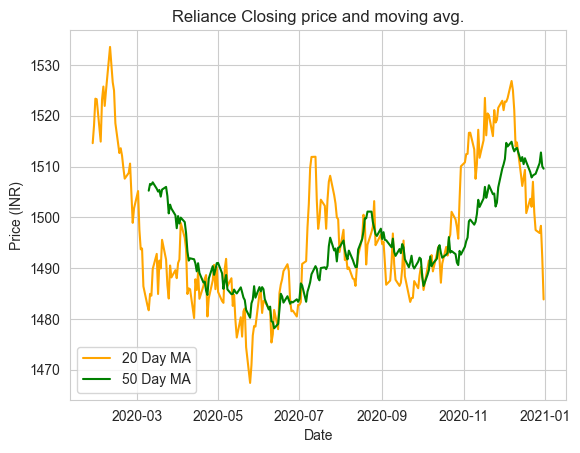

In [132]:
plt.Figure(figsize=(12,6))
#plt.plot(stock_data['Close'],label='Close Price',color='blue')
plt.plot(stock_data['20_MA'],label='20 Day MA',color='orange')
plt.plot(stock_data['50_MA'],label='50 Day MA',color='green')
plt.title('Reliance Closing price and moving avg.')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()


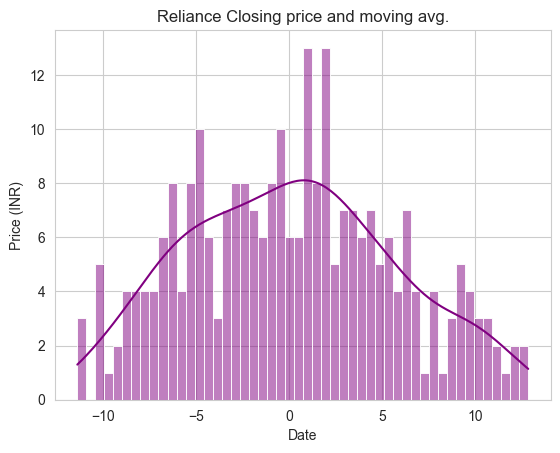

In [133]:
plt.Figure(figsize=(12,6))
sns.histplot(stock_data['Daily Returns'].dropna(), bins=50,kde='True',color='purple')
plt.title('Reliance Closing price and moving avg.')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.show()

In [134]:
stock_data.to_csv('update_stock_data.csv')